# Part 1 : Dimentionality Reduction on IRIS dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()

X = iris.data    # The inputs
y = iris.target  # The wanted output

df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df = df.drop(['Label'], axis=1)


In [3]:
df.head()   # The first five elements

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()  # the last five elements

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df.describe()   # statistical and general information about the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


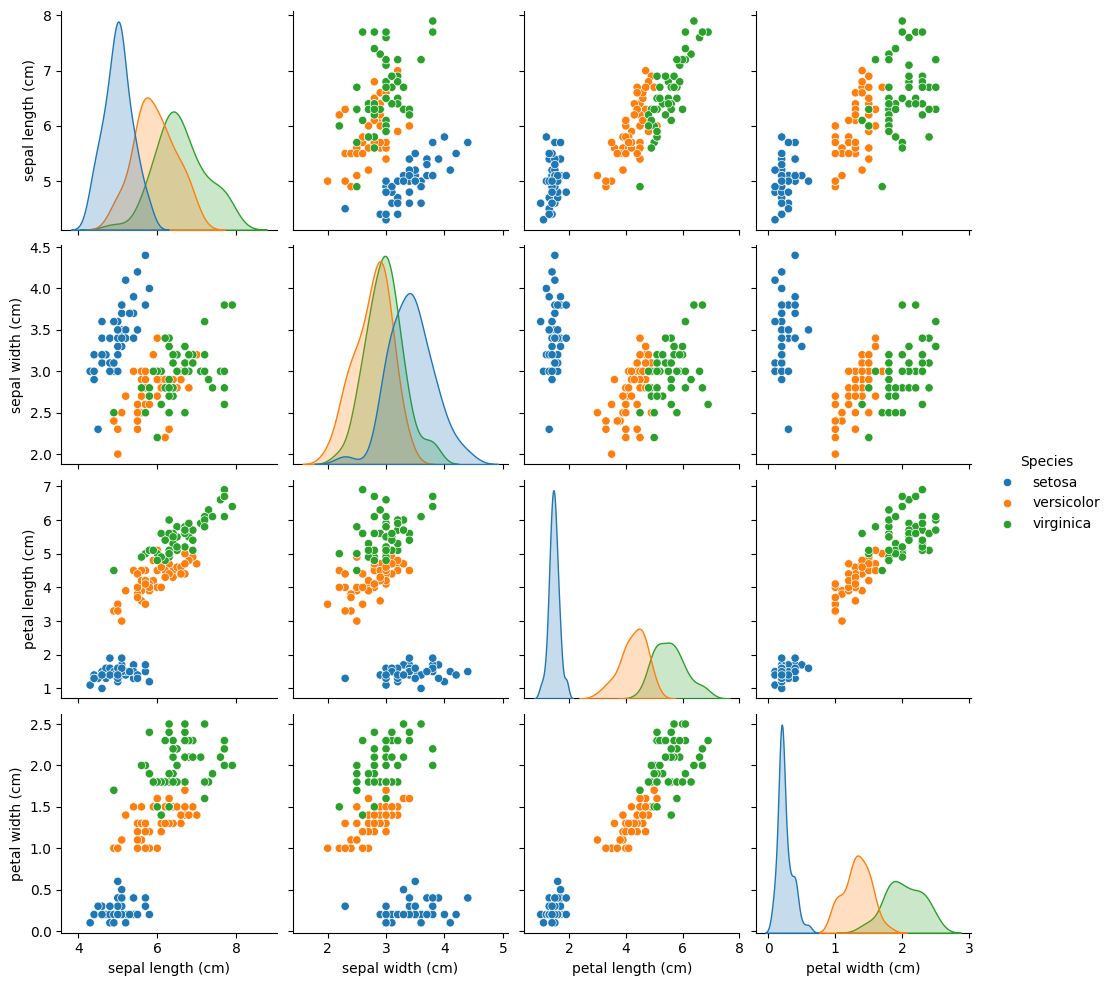

In [6]:
sns.pairplot(df,  hue='Species')


In [7]:
#Transform features
pca = PCA()
X_pca = pca.fit_transform(X)

#Merge with df
pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       Species       PC1   

In [8]:
# Explained Variance Ratio of principle components
for i in range(4):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))



PC1: 0.9246187232017341
PC2: 0.05306648311706383
PC3: 0.017102609807927525
PC4: 0.00521218387327465


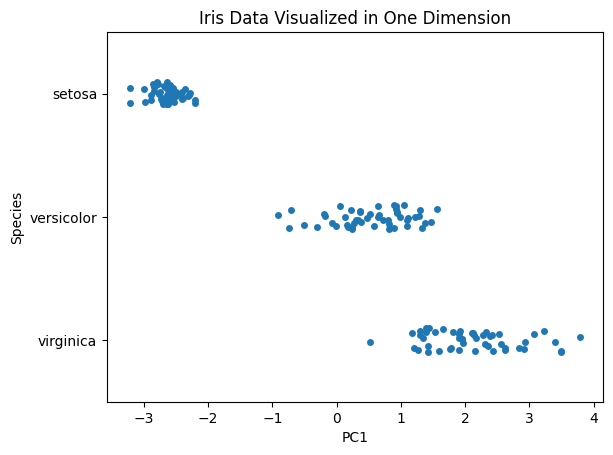

In [9]:
sns.stripplot(x="PC1", y="Species", data=df,jitter=True)
plt.title('Iris Data Visualized in One Dimension');


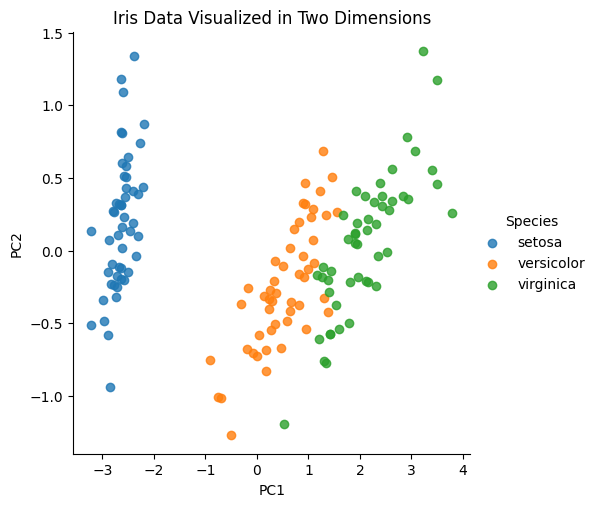

In [10]:
sns.lmplot(x='PC1',y='PC2',data=df,hue='Species',fit_reg=False)
plt.title('Iris Data Visualized in Two Dimensions');


In [11]:
# display the components of the PCA
pca.components_



array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

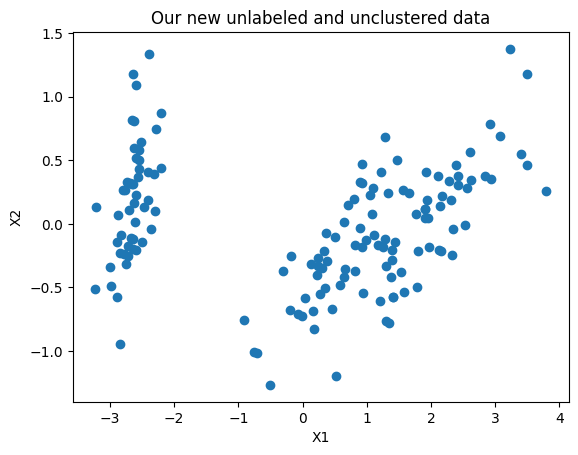

In [12]:
new_X = X_pca[:,:2]

plt.scatter(new_X[:, 0], new_X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Our new unlabeled and unclustered data')
plt.show()

# Apply K-Means (k=2)

### Step1 import the KMeans model from sicit-learn

In [13]:
# first import the KMeans model from sicit-learn
from sklearn.cluster import KMeans

### Step2 Create a KMeans model with 2D

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42)

### Step3. Fit the model to the 2D data from the PCA


In [15]:
kmeans.fit(new_X)

KMeans(n_clusters=2, random_state=42)

### Step4. Predict the cluster labels for each point


In [16]:
clusters = kmeans.predict(new_X)

### Step5. Add the cluster labels to the DataFrame for visualization


In [17]:
df['Cluster'] = clusters


### Step 5: Visualize the clustering result using a scatter plot

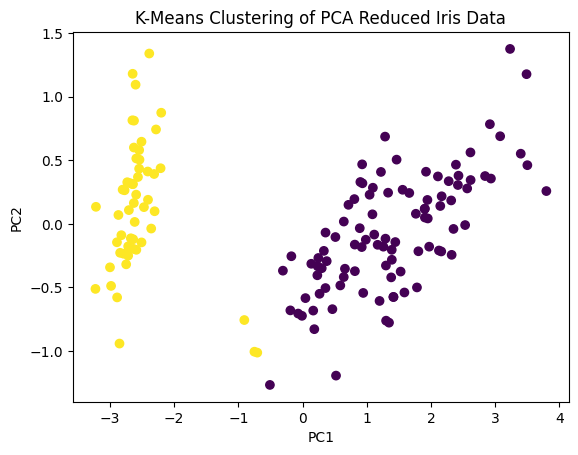

In [18]:
plt.scatter(new_X[:,0], new_X[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of PCA Reduced Iris Data')
plt.show()

# Apply k-Means (k=3)

### Step 1. Import the Kmeans model from sicit learn


In [19]:
from sklearn.cluster import KMeans

### Step 2. Loard and indicate the number of clusters in the model

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)

### Step 3 . Fit the model

In [21]:
kmeans.fit(new_X)

KMeans(n_clusters=3, random_state=42)

### Step 4.  Predict the cluster level for each point

In [22]:
clusters = kmeans.predict(new_X)

### Step 5. Add the cluster to the DataFramce for visualization

In [23]:
df['Cluster'] = clusters


### Step 6. Visualize data using the scatter plot

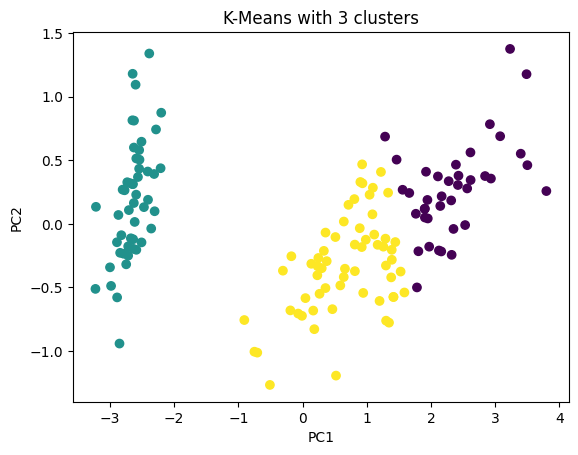

In [24]:
plt.scatter(new_X[:,0], new_X[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means with 3 clusters')
plt.show()

# Apply mini batch k-means (k=3)

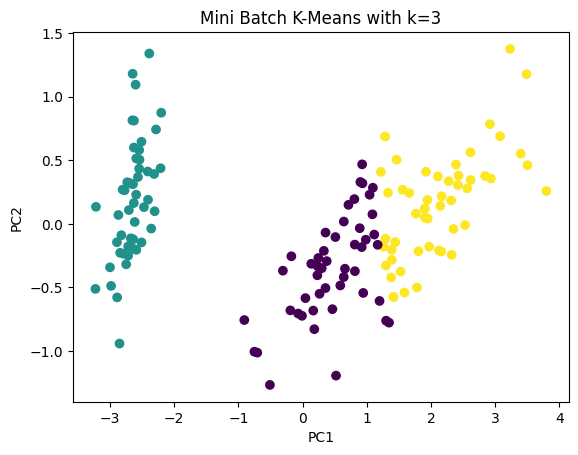

In [25]:
from sklearn.cluster import MiniBatchKMeans

mini_batch = MiniBatchKMeans(n_clusters = 3, random_state = 42, batch_size=10)
mini_batch.fit(X_pca)
labels = mini_batch.labels_

# visualize
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Mini Batch K-Means with k=3")
plt.show()

# Apply Affinity Propagation Clustering

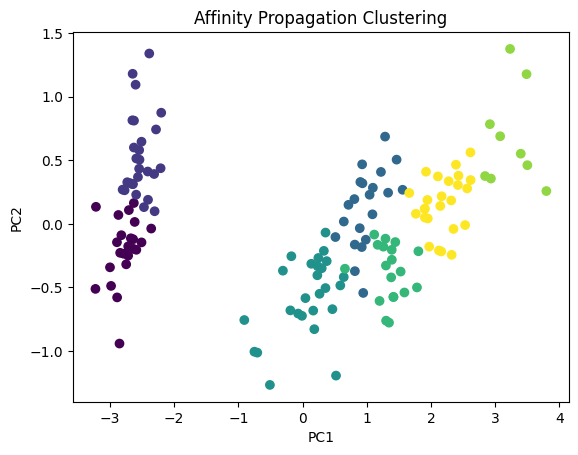

In [26]:
from sklearn.cluster import AffinityPropagation
# Load the model
affiniry_propagation = AffinityPropagation()
affiniry_propagation.fit(X_pca)
 # Get the cluster labels
labels = affiniry_propagation.labels_

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Affinity Propagation Clustering')
plt.show()

# Apply Mean Shift Clustering

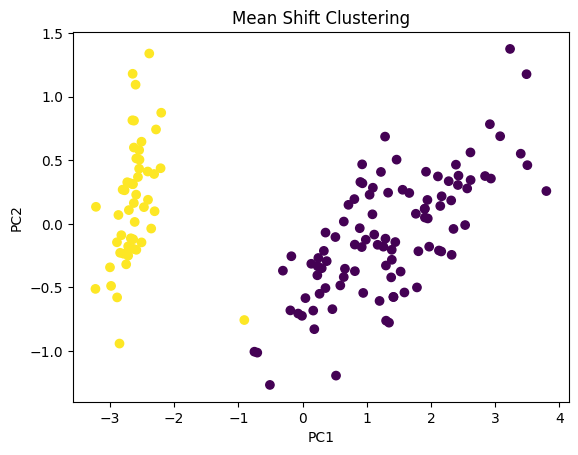

In [27]:
# import the model
from sklearn.cluster import MeanShift
# load the model
mean_shift = MeanShift()
mean_shift.fit(X_pca)
labels = mean_shift.labels_
# Plot the data for visualization 
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Mean Shift Clustering')
plt.show()

# Spectral Clustering

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


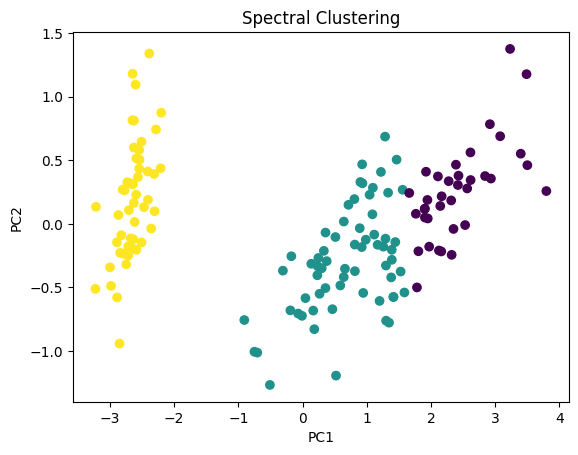

In [28]:
# import the spectral clustering model from scikit-learn
from sklearn.cluster import SpectralClustering
# load and train the model
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels = spectral_clustering.fit_predict(X_pca)
# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral Clustering')
plt.show()

# Agglomerative Clustering

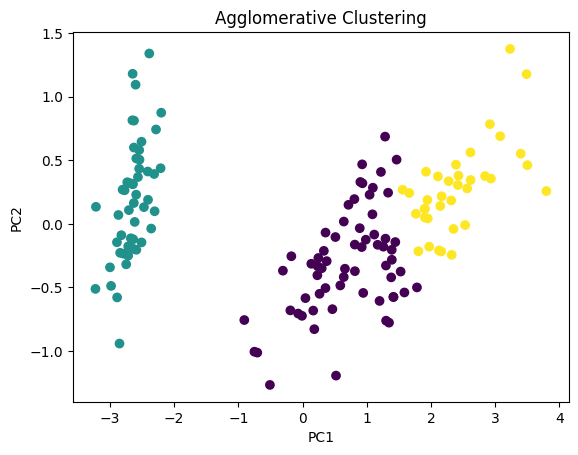

In [29]:
# Import the library
from sklearn.cluster import AgglomerativeClustering
# Load the model
agglomerative_cluster = AgglomerativeClustering(n_clusters=3)
labels = agglomerative_cluster.fit_predict(X_pca)
# Visualise data
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering')
plt.show()

# Gaussian Misture Clustering

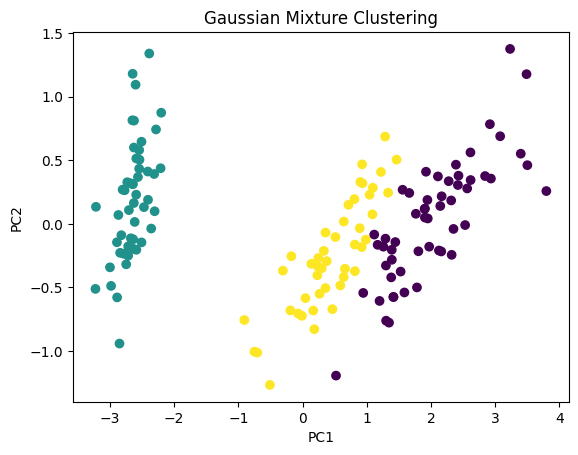

In [30]:
# Import the model
from sklearn.mixture import GaussianMixture
#load the model
gaussian_mixture = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gaussian_mixture.fit_predict(X_pca)
# Visualise data
plt.scatter(X_pca[:,0], X_pca[:,1], c=gmm_labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gaussian Mixture Clustering')
plt.show()

# Accuracy based on original labels

Now consider the original IRIS labels ans measure the accuracy of each clustering labelling

In [31]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Function to map the clustering labels to the original labels
def map_labels(predicted_labels, true_labels):
    mapped_labels = np.zeros_like(predicted_labels)
    for i in range(3):
        mask = (predicted_labels == i)
        mapped_labels[mask] = mode(true_labels[mask])[0]
    return mapped_labels

# Apply mapping functions
mapped_gmm_labels = map_labels(labels, y)

# Calculate the accuracy of the Gaussian Mixture Model
gmm_accuracy = accuracy_score(y, mapped_gmm_labels)

print(f'Gaussian Mixture Clustering Accuracy: {gmm_accuracy:.2f}')

Gaussian Mixture Clustering Accuracy: 0.89
